<a href="https://colab.research.google.com/github/EdWu-datascience/Machine-Learning-Algorithm/blob/main/Lending_club_data_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **dataset source**
This dataset comes from Lending Club and provided by College of the elephant，an online course provider in China.

The dataset contains customer's personal information like employment title,years of working,income etc as well as loan information like loan amount,term,etc.


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Dataset Repository/loan.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
import numpy as np
np.set_printoptions(suppress=True)

# **Some basic check on the data**


*   data preview
*   stat infomation of the data

*   some basic information of the data





In [4]:
raw_data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,511.000000,509.000000,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,109981.011585,18.310118,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,52730.379847,7.169233,0.077625,1.031137e+04,1.537500e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,1.0,76032.500000,13.200000,0.000000,0.000000e+00,2.985300e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,1.0,101771.000000,17.610000,0.000000,0.000000e+00,8.055900e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.0000

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

# **pre data analytics on raw dataset**


*   We are interested about the percentage of different loan status in the country
*   and we also want to visualize loan amount in each month to check if there is a distinct difference about the loan amount in each month


*   the loan amount difference amount different state is also an useful informaiton for us.




In [7]:
loan_status_dist = pd.DataFrame(raw_data['loan_status'].value_counts())
loan_status_dist.rename(columns={'loan_status':'number of status'},inplace=True)
loan_status_dist['percent_each_status']=round(loan_status_dist['number of status']/sum(loan_status_dist['number of status']),4)
loan_status_dist

,number of status,percent_each_status
Current,601779,0.6782
Fully Paid,207723,0.2341
Charged Off,45248,0.0510
Late (31-120 days),11591,0.0131
Issued,8460,0.0095
In Grace Period,6253,0.0070
Late (16-30 days),2357,0.0027
Does not meet the credit policy. Status:Fully Paid,1988,0.0022
Default,1219,0.0014
Does not meet the credit policy. Status:Charged Off,761,0.0009


we can see that around 6% of loans status are Charge Off or late than the ddl or default.

**data engineering**

we need to change the type of the issue_d(issue month) to datetime format.



In [8]:
raw_data['issue_d2']=pd.to_datetime(raw_data['issue_d'],errors='coerce')
raw_data['issue_d2']
data_group_by_date=raw_data.groupby(raw_data['issue_d2']).sum()
data_group_by_date.reset_index(inplace=True)
used_data = data_group_by_date[['issue_d2','loan_amnt']]
used_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Dataset Repository/dateoutput.csv',index=False)

**change of loan amount over time**

Text(0.5, 1.0, 'date&loan_amount')

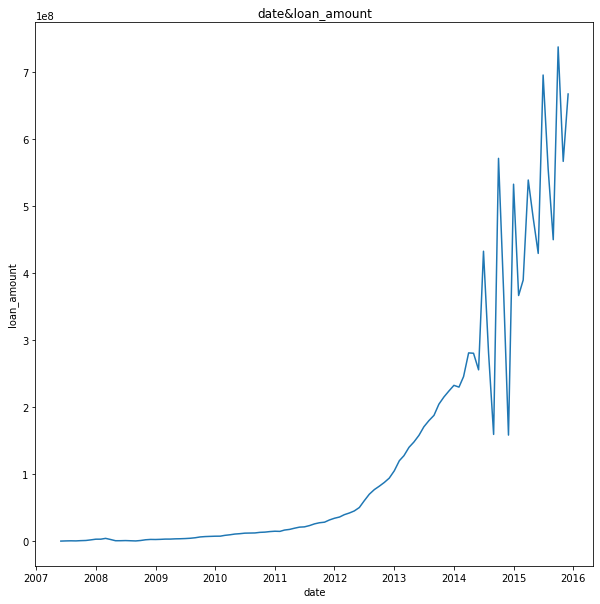

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(used_data['issue_d2'],used_data['loan_amnt'])
plt.xlabel('date')
plt.ylabel('loan_amount')
plt.title('date&loan_amount')

we can see that from 2007 to 2012,the loan amount shows a stable and relative slow increase.
the loan amount has a steep increase from 2012 to 2014.
after that,the loan amount presents a high variance change from year 2014 to year 2016 but increase in trend.

**difference of loan amount across states**

In [10]:
data_group_by_state=raw_data.groupby(raw_data['addr_state']).sum()
data_group_by_state
data_group_by_state.reset_index(inplace=True)
data_group_by_state
used_data = data_group_by_state[['addr_state','loan_amnt']]
used_data.sort_values(by=['loan_amnt'],inplace=True,ascending=False)
used_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,addr_state,loan_amnt
4,CA,1.898145e+09
43,TX,1.109130e+09
34,NY,1.076942e+09
9,FL,8.489891e+08
14,IL,5.390684e+08
31,NJ,5.152530e+08
38,PA,4.556429e+08
10,GA,4.347096e+08
35,OH,4.226754e+08
45,VA,4.112220e+08


<BarContainer object of 51 artists>

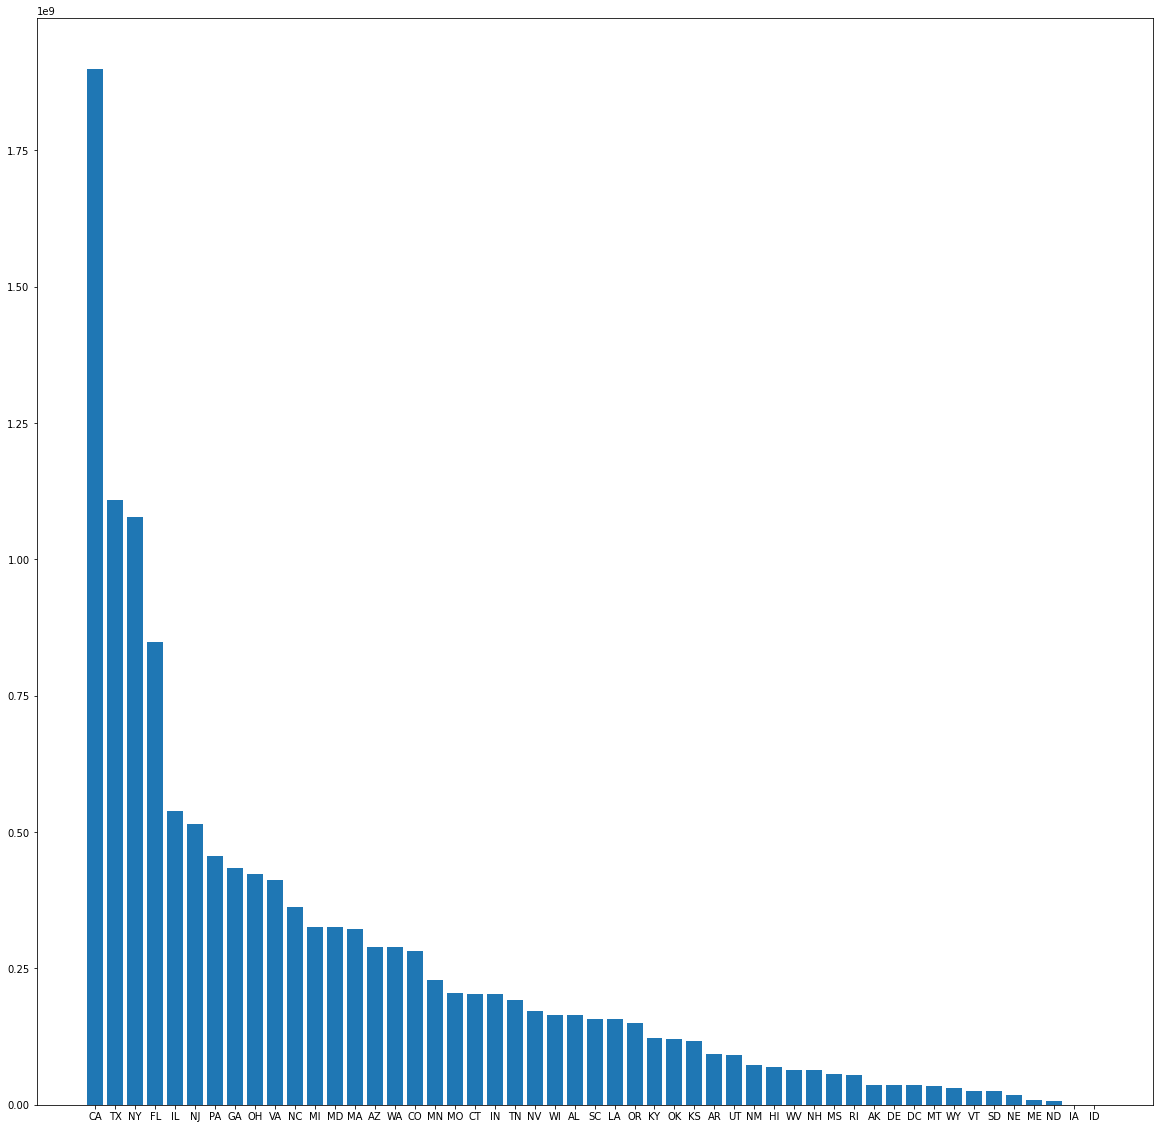

In [11]:
plt.figure(figsize=(20,20))
plt.bar(used_data['addr_state'],used_data['loan_amnt'])

we can see that CA,TX,NY,and FL are the four places with highest loan amount across the nation and CA has the hightest loan amount than every state(almost two times than the second highest state)

since there are so many people applying for loan,it's very interesting to see what's the purposes that those people apply for loan.

In [12]:
data_groupby_purpose=raw_data.groupby(raw_data['purpose']).count()
data_groupby_purpose.reset_index(inplace=True)
data_groupby_purpose=data_groupby_purpose[['purpose','id']]
data_groupby_purpose.rename(columns={'id':'Frequency'},inplace=True)
data_groupby_purpose.sort_values(by=['Frequency'],inplace=True,ascending=False)
data_groupby_purpose

,purpose,Frequency
2,debt_consolidation,524215
1,credit_card,206182
4,home_improvement,51829
9,other,42894
6,major_purchase,17277
11,small_business,10377
0,car,8863
7,medical,8540
8,moving,5414
12,vacation,4736


<BarContainer object of 14 artists>

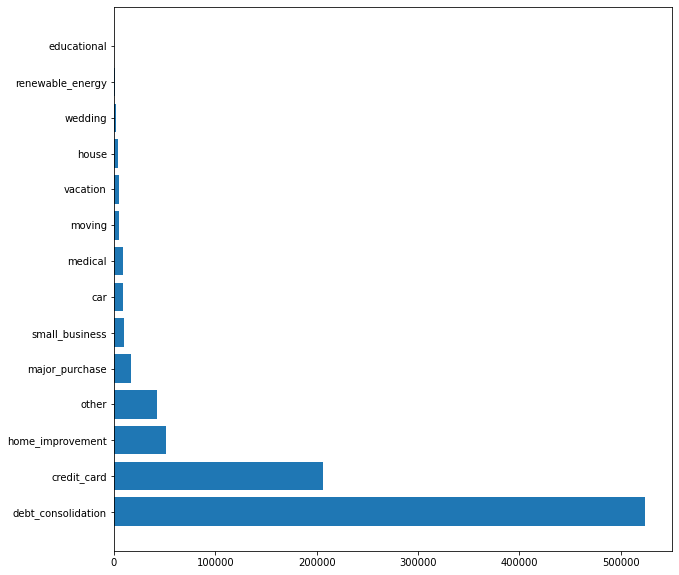

In [13]:
plt.figure(figsize=(10,10))
plt.barh(data_groupby_purpose['purpose'],data_groupby_purpose['Frequency'])

we can see that a majority of people apply for loan for the purpose of debt_consolidation and debt_consolidation is a imporant business for lending club company

In [14]:
loan_status_dist

,number of status,percent_each_status
Current,601779,0.6782
Fully Paid,207723,0.2341
Charged Off,45248,0.0510
Late (31-120 days),11591,0.0131
Issued,8460,0.0095
In Grace Period,6253,0.0070
Late (16-30 days),2357,0.0027
Does not meet the credit policy. Status:Fully Paid,1988,0.0022
Default,1219,0.0014
Does not meet the credit policy. Status:Charged Off,761,0.0009


we are only interested at whether the borrowers will pay the debt or not in the end. so status like late or In grace period will not be included in our following work.

we only keep these data with status as: Fully Paid,Charged Off,Default(Charged Off means there is no longer a reasonable expectation that the borrowers will make payments.
  Default means that borrowers have failed to make payment after an extended period of time)

In [15]:
filter_data = raw_data[(raw_data['loan_status']=='Fully Paid') | (raw_data['loan_status']=='Default') | (raw_data['loan_status']=='Charged Off')]
filter_data.reset_index(inplace=True,drop=True)
filter_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issue_d2
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-01
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-01
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-01
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-01
4,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,NaN,NaN,9.0,0.0,7963.0,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-2015,161.03,NaN,Sep-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-01


for fun!

we don't know if there is a relationship between whether borrowers will pay debt or not and states.

this is a quite interesting thought, let's take a look at it 

we are only interested at top 10 loan states

In [16]:
top10states = list(used_data.iloc[0:10,0])
top10states

['CA', 'TX', 'NY', 'FL', 'IL', 'NJ', 'PA', 'GA', 'OH', 'VA']

In [17]:
state_loan = filter_data.groupby(['addr_state','loan_status']).count().reset_index()[['addr_state','loan_status','id']]
state_loan.rename(columns={'id':'frequency'},inplace=True)
filter_state_loan = state_loan['addr_state'].isin(top10states)
state_loan = state_loan[filter_state_loan].reset_index(drop=True)
state_loan

,addr_state,loan_status,frequency
0,CA,Charged Off,7332
1,CA,Default,211
2,CA,Fully Paid,35778
3,FL,Charged Off,3524
4,FL,Default,95
5,FL,Fully Paid,14021
6,GA,Charged Off,1360
7,GA,Default,36
8,GA,Fully Paid,6654
9,IL,Charged Off,1542


In [18]:
charged_off=list(state_loan[state_loan['loan_status']=='Charged Off']['frequency'])
fully_paid=list(state_loan[state_loan['loan_status']=='Fully Paid']['frequency'])
default=list(state_loan[state_loan['loan_status']=='Default']['frequency'])
state_abbr = list(state_loan['addr_state'].unique())
print(charged_off)
print(fully_paid)
print(default)
print(state_abbr)

[7332, 3524, 1360, 1542, 1841, 4124, 1472, 1557, 3035, 1438]
[35778, 14021, 6654, 7711, 7760, 17214, 6266, 6842, 16308, 6504]
[211, 95, 36, 28, 49, 106, 40, 39, 111, 29]
['CA', 'FL', 'GA', 'IL', 'NJ', 'NY', 'OH', 'PA', 'TX', 'VA']


let's create a stackbar chart 

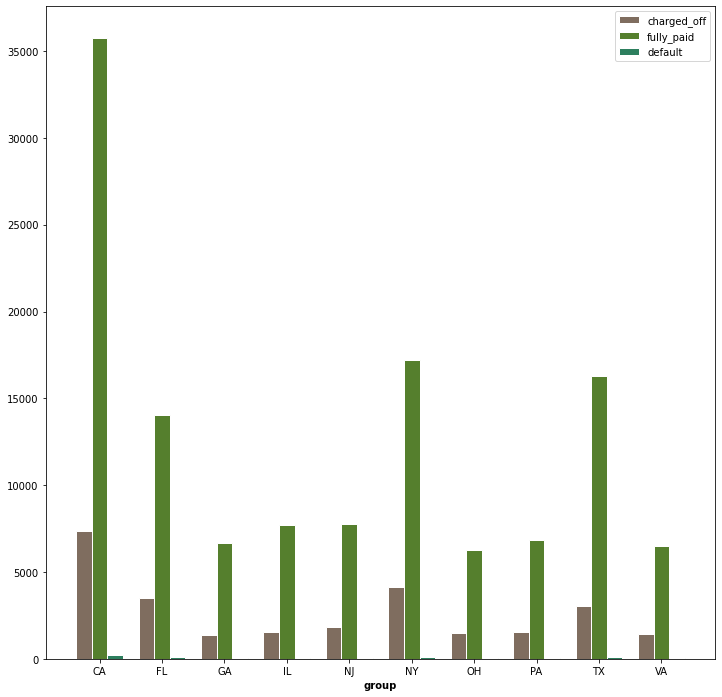

In [19]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = charged_off
bars2 = fully_paid
bars3 = default
 
# Set position of bar on X axis
r1 = np.arange(len(default))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='charged_off')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='fully_paid')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='default')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], state_abbr)
 
# Create legend & Show graphic
plt.legend()
plt.show()

actually, there is not any relationship between whether borrowers will pay the debt or not and state.LOL

make a copy of the data

In [20]:
used_filter_data=filter_data.copy()

# **data engineering**

**data engineering—let's create a label column, if the loan_status is fully paid set the label equal to 1, or 0 otherwise.**

In [21]:
def set_label(status):
  if status == 'Fully Paid':
    return 1
  else:
    return 0

In [22]:
used_filter_data['label']=used_filter_data['loan_status'].apply(set_label)
used_filter_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issue_d2,label
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-01,1
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-01,0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-01,1
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-01,1
4,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,NaN,NaN,9.0,0.0,7963.0,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-2015,161.03,NaN,Sep-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-01,1


**data engineering—employment length**

In [23]:
def emp_length_pro(emp):
  if emp == '< 1 year' or str(emp) == 'nan':
    return 0.5
  elif emp == '10+ years':
    return 10
  elif 'years' in emp:
    return int(emp.replace('years',''))
  else:
    return int(emp.replace('year',''))

In [24]:
used_filter_data['emp_length'].groupby(used_filter_data['emp_length']).count()

emp_length
1 year       16951
10+ years    77256
2 years      23647
3 years      20484
4 years      16263
5 years      18136
6 years      14816
7 years      14156
8 years      11922
9 years       9616
< 1 year     20975
Name: emp_length, dtype: int64

In [25]:
used_filter_data['emp_length_feature']=used_filter_data['emp_length'].apply(emp_length_pro)
used_filter_data['emp_length_feature'].groupby(used_filter_data['emp_length_feature']).count()

emp_length_feature
0.5     30943
1.0     16951
2.0     23647
3.0     20484
4.0     16263
5.0     18136
6.0     14816
7.0     14156
8.0     11922
9.0      9616
10.0    77256
Name: emp_length_feature, dtype: int64

**data engineering—change the feature of grade from categorical type to numerical**


since grade is ordinal data, and there is a quite useful tool for handling this tpye of data in python and that is label encoding.



In [26]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
grade = np.array(used_filter_data['grade'])
used_filter_data['grade_feature']=label_encoding.fit_transform(grade)

**data engineering-change the feature of term**

In [27]:
used_filter_data['term'].groupby(used_filter_data['term']).count()

term
 36 months    197373
 60 months     56817
Name: term, dtype: int64

In [28]:
def term_feature_pro(term):
  return int(term[0:3]) 

In [29]:
used_filter_data['term_feature']=used_filter_data['term'].apply(term_feature_pro)
used_filter_data['term_feature'].groupby(used_filter_data['term_feature']).count()

term_feature
36    197373
60     56817
Name: term_feature, dtype: int64

**data engineering**—
we need to change the format of features like home_ownership,purpose.

In [30]:
used_filter_data['home_ownership'].groupby(used_filter_data['home_ownership']).count()
label_encoding = preprocessing.LabelEncoder()
home_feature = np.array(used_filter_data['home_ownership'])
purpose_feature = np.array(used_filter_data['purpose'])
home_feature_labelcoding = label_encoding.fit_transform(home_feature)
purpose_feature_labelcoding = label_encoding.fit_transform(purpose_feature)

In [31]:
encoding_onehot = preprocessing.OneHotEncoder()
home = home_feature_labelcoding.reshape(len(home_feature_labelcoding),1)
purpose = purpose_feature_labelcoding.reshape(len(purpose_feature_labelcoding),1)
home_feature_pro=encoding_onehot.fit_transform(home)
purpose_feature_pro = encoding_onehot.fit_transform(purpose)
home_owner_feature=home_feature_pro.toarray()
purpose_feature = purpose_feature_pro.toarray()
print(home_owner_feature.shape)
print(purpose_feature.shape)
print(home_owner_feature)
print('----')
print(purpose_feature)

(254190, 6)
(254190, 14)
[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
----
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [32]:
col_home = []
col_purpose = []
for i in range(1,home_owner_feature.shape[1]+1):
  col_home.append('home_f'+str(i))
for i in range(1,purpose_feature.shape[1]+1):
  col_purpose.append('purpose_f'+str(i))
home_owner_feature = pd.DataFrame(home_owner_feature,columns=col_home)
purpose_feature = pd.DataFrame(purpose_feature,columns=col_purpose)


In [33]:
home_owner_feature

,home_f1,home_f2,home_f3,home_f4,home_f5,home_f6
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
254185,0.0,1.0,0.0,0.0,0.0,0.0
254186,0.0,0.0,0.0,0.0,0.0,1.0
254187,0.0,0.0,0.0,0.0,0.0,1.0
254188,0.0,1.0,0.0,0.0,0.0,0.0


In [34]:
purpose_feature

,purpose_f1,purpose_f2,purpose_f3,purpose_f4,purpose_f5,purpose_f6,purpose_f7,purpose_f8,purpose_f9,purpose_f10,purpose_f11,purpose_f12,purpose_f13,purpose_f14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
254186,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254187,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**now we need to select which feature we'll use for our model training**

In [57]:
import pandas as pd
numeric_cols = ['int_rate', 'grade_feature', 'loan_amnt', 'installment', 'annual_inc', 'dti',
          'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
          'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'term_feature',
          'emp_length_feature','funded_amnt','funded_amnt_inv']
y = used_filter_data[['label']]
X = pd.concat([used_filter_data[numeric_cols],home_owner_feature,purpose_feature],axis=1)
data_for_model = pd.concat([X,y],axis=1)
data_for_model


,int_rate,grade_feature,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,term_feature,emp_length_feature,funded_amnt,funded_amnt_inv,home_f1,home_f2,home_f3,home_f4,home_f5,home_f6,purpose_f1,purpose_f2,purpose_f3,purpose_f4,purpose_f5,purpose_f6,purpose_f7,purpose_f8,purpose_f9,purpose_f10,purpose_f11,purpose_f12,purpose_f13,purpose_f14,label
0,10.65,1,5000.0,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,36,10.0,5000.0,4975.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,15.27,2,2500.0,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,60,0.5,2500.0,2500.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,15.96,2,2400.0,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,36,10.0,2400.0,2400.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,13.49,2,10000.0,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,36,10.0,10000.0,10000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,7.90,0,5000.0,156.46,36000.0,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,0.0,0.0,36,3.0,5000.0,5000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254185,15.99,3,4200.0,147.64,48000.0,36.93,0.0,0.0,13.0,0.0,12943.0,63.4,45.0,0.0,0.0,36,10.0,4200.0,4200.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
254186,6.03,0,10775.0,327.95,54000.0,13.22,1.0,0.0,9.0,0.0,10776.0,25.8,21.0,0.0,0.0,36,0.5,10775.0,10775.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
254187,16.49,3,6225.0,220.37,27000.0,18.58,0.0,1.0,3.0,0.0,1756.0,97.6,4.0,0.0,0.0,36,2.0,6225.0,6225.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
254188,8.67,1,4000.0,126.59,50000.0,12.63,0.0,0.0,11.0,1.0,1700.0,5.6,30.0,0.0,0.0,36,10.0,4000.0,4000.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


**take a look at our processed features and feature**

In [38]:
print(X)
print(y)


        int_rate  grade_feature  ...  purpose_f13  purpose_f14
0          10.65              1  ...          0.0          0.0
1          15.27              2  ...          0.0          0.0
2          15.96              2  ...          0.0          0.0
3          13.49              2  ...          0.0          0.0
4           7.90              0  ...          0.0          1.0
...          ...            ...  ...          ...          ...
254185     15.99              3  ...          0.0          0.0
254186      6.03              0  ...          0.0          0.0
254187     16.49              3  ...          0.0          0.0
254188      8.67              1  ...          0.0          0.0
254189     19.24              4  ...          0.0          0.0

[254190 rows x 39 columns]
        label
0           1
1           0
2           1
3           1
4           1
...       ...
254185      0
254186      1
254187      1
254188      1
254189      0

[254190 rows x 1 columns]


**before put our features into training model,it always better to take a look at the weight of each type of label**

In [76]:
data_for_model.dropna(inplace=True)
X=data_for_model.iloc[:,0:38]
y=pd.DataFrame(data_for_model.iloc[:,39])

In [79]:
print(y[y['label']==1].shape[0])
print(y[y['label']==0].shape[0])
print(round(y[y['label']==1].shape[0]/y.shape[0],2))
print(round(y[y['label']==0].shape[0]/y.shape[0],2))

207521
46413
0.82
0.18


in our dataset,data being labelled as 1 takes 82% of the total data while data being labelled as 0 only takes around 18%,so there is an imbalance in our dataset and we will need to deal with it to alleviate the impact on model.

In [83]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X,y = sm.fit_resample(X,y)
X
y

array([1, 0, 1, ..., 0, 0, 0])

after using SMOTE handling our data, let's take a look whether the imbalance still exist.

In [84]:
print(y[y==1].shape[0])
print(y[y==0].shape[0])
print(round(y[y==1].shape[0]/y.shape[0],2))
print(round(y[y==0].shape[0]/y.shape[0],2))

207521
207521
0.5
0.5


wonderful! the imbalance has gone!

now, we need to split our dataset into training data and tesing data.

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pre = model.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pre,y_test)

0.6012966911013113

the accuracy for our model is not very good. let's consider possible methods to improve our model's performance
(feature scaling,hyper-parameter choice or even choose more features for model training)